# YIN'S CAPITAL XAI INITIATIVES: UCI Breast Cancer Data 

UCI ML Breast Cancer Wisconsin (Diagnostic) dataset is provided by Dr. William H. Wolberg, General Surgery Dept. University of Wisconsin at Clinical Sciences Center. Link can be accessed [here](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)).

Data Set Information: 569 observations over 32 variables

- (1) ID number

- (2) Diagnosis (M = malignant, B = benign)

- (3-32) Ten real-valued features are computed for each cell nucleus:
    - a) radius (mean of distances from center to points on the perimeter)
    - b) texture (standard deviation of gray-scale values)
    - c) perimeter
    - d) area
    - e) smoothness (local variation in radius lengths)
    - f) compactness (perimeter^2 / area - 1.0)
    - g) concavity (severity of concave portions of the contour)
    - h) concave points (number of concave portions of the contour)
    - i) symmetry
    - j) fractal dimension ("coastline approximation" - 1)

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. 

Separating plane described above was obtained using Multisurface Method-Tree (MSM-T) \[K. P. Bennett, "Decision Tree Construction Via Linear Programming." Proceedings of the 4th Midwest Artificial Intelligence and Cognitive Science Society, pp. 97-101, 1992\], a classification method which uses linear programming to construct a decision tree. Relevant features were selected using an exhaustive search in the space of 1-4 features and 1-3 separating planes.

The actual linear program used to obtain the separating plane in the 3-dimensional space is that described in: \[K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34\].


### Environment Initiation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

### Loading Data

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
data = pd.DataFrame(
    np.c_[data['data'], data['target']],
    columns= np.append(data['feature_names'], ['target']))

### Create Training and Testing Set

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1), 
    data.target, test_size=0.2,
    random_state=0)
X_train.shape, X_test.shape

((455, 30), (114, 30))

In [6]:
X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
338,10.05,17.53,64.41,310.8,0.10070,0.07326,0.02511,0.01775,0.1890,0.06331,...,11.16,26.84,71.98,384.0,0.1402,0.14020,0.1055,0.06499,0.2894,0.07664
427,10.80,21.98,68.79,359.9,0.08801,0.05743,0.03614,0.01404,0.2016,0.05977,...,12.76,32.04,83.69,489.5,0.1303,0.16960,0.1927,0.07485,0.2965,0.07662
406,16.14,14.86,104.30,800.0,0.09495,0.08501,0.05500,0.04528,0.1735,0.05875,...,17.71,19.58,115.90,947.9,0.1206,0.17220,0.2310,0.11290,0.2778,0.07012
96,12.18,17.84,77.79,451.1,0.10450,0.07057,0.02490,0.02941,0.1900,0.06635,...,12.83,20.92,82.14,495.2,0.1140,0.09358,0.0498,0.05882,0.2227,0.07376
490,12.25,22.44,78.18,466.5,0.08192,0.05200,0.01714,0.01261,0.1544,0.05976,...,14.17,31.99,92.74,622.9,0.1256,0.18040,0.1230,0.06335,0.3100,0.08203


In [7]:
X_test.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
512,13.40,20.52,88.64,556.7,0.11060,0.14690,0.14450,0.08172,0.2116,0.07325,...,16.41,29.66,113.30,844.4,0.15740,0.38560,0.51060,0.20510,0.3585,0.11090
457,13.21,25.25,84.10,537.9,0.08791,0.05205,0.02772,0.02068,0.1619,0.05584,...,14.35,34.23,91.29,632.9,0.12890,0.10630,0.13900,0.06005,0.2444,0.06788
439,14.02,15.66,89.59,606.5,0.07966,0.05581,0.02087,0.02652,0.1589,0.05586,...,14.91,19.31,96.53,688.9,0.10340,0.10170,0.06260,0.08216,0.2136,0.06710
298,14.26,18.17,91.22,633.1,0.06576,0.05220,0.02475,0.01374,0.1635,0.05586,...,16.22,25.26,105.80,819.7,0.09445,0.21670,0.15650,0.07530,0.2636,0.07676
37,13.03,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,0.1467,0.05863,...,13.30,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169


### Feature Selection (Forward) through ROC/AUC of Random Forest Classifier

In [20]:
# step forward feature selection
# select top 10 features based on the optimal roc_auc and RandomForest Classifier

sfs1 = SFS(RandomForestClassifier(n_jobs=-1,n_estimators=5), 
           k_features=10, 
           forward=True, 
           floating=False, 
           verbose=1,
           scoring='roc_auc',
           cv=3)

sfs1 = sfs1.fit(np.array(X_train), y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   15.5s finished
Features: 1/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:   10.8s finished
Features: 2/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:   10.5s finished
Features: 3/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   10.2s finished
Features: 4/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    9.7s finished
Features: 5/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    9.0s finished
Features: 6/10[Parallel(

In [21]:
list(sfs1.k_feature_idx_)

[1, 5, 10, 12, 13, 22, 23, 24, 26, 28]

In [22]:
selected_feat1= X_train.columns[list(sfs1.k_feature_idx_)]
selected_feat1

Index(['mean texture', 'mean compactness', 'radius error', 'perimeter error',
       'area error', 'worst perimeter', 'worst area', 'worst smoothness',
       'worst concavity', 'worst symmetry'],
      dtype='object')

In [11]:
X_train[X_train.columns[list(sfs1.k_feature_idx_)]].head()

,mean symmetry,mean fractal dimension,area error,compactness error,worst radius,worst texture,worst perimeter,worst smoothness,worst compactness,worst concave points
338,0.1890,0.06331,16.85,0.01449,11.16,26.84,71.98,0.1402,0.14020,0.06499
427,0.2016,0.05977,20.20,0.02148,12.76,32.04,83.69,0.1303,0.16960,0.07485
406,0.1735,0.05875,21.83,0.01246,17.71,19.58,115.90,0.1206,0.17220,0.11290
96,0.1900,0.06635,24.44,0.01179,12.83,20.92,82.14,0.1140,0.09358,0.05882
490,0.1544,0.05976,18.04,0.01205,14.17,31.99,92.74,0.1256,0.18040,0.06335


### Feature Selection (Backward) through ROC/AUC of Random Forest Classifier

In [10]:
# step backward feature selection
# select top 10 features based on the optimal roc_auc and RandomForest Classifier

sfs2 = SFS(RandomForestClassifier(n_jobs=-1,n_estimators=5), 
           k_features=10, 
           forward=False, 
           floating=False, 
           verbose=1,
           scoring='roc_auc',
           cv=3)

sfs2 = sfs2.fit(np.array(X_train.fillna(0)), y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   10.6s finished
Features: 29/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:   10.3s finished
Features: 28/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    9.9s finished
Features: 27/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    9.4s finished
Features: 26/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    9.0s finished
Features: 25/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    8.8s finished
Features: 24/10[Par

In [11]:
selected_feat2= X_train.columns[list(sfs2.k_feature_idx_)]
selected_feat2

Index(['mean perimeter', 'mean fractal dimension', 'radius error',
       'area error', 'concave points error', 'symmetry error', 'worst texture',
       'worst area', 'worst smoothness', 'worst concavity'],
      dtype='object')

In [12]:
X_train[X_train.columns[list(sfs2.k_feature_idx_)]].head()

,mean perimeter,mean fractal dimension,radius error,area error,concave points error,symmetry error,worst texture,worst area,worst smoothness,worst concavity
338,64.41,0.06331,0.2619,16.85,0.008043,0.02100,26.84,384.0,0.1402,0.1055
427,68.79,0.05977,0.3077,20.20,0.010450,0.01844,32.04,489.5,0.1303,0.1927
406,104.30,0.05875,0.2387,21.83,0.008747,0.01500,19.58,947.9,0.1206,0.2310
96,77.79,0.06635,0.3661,24.44,0.015190,0.02220,20.92,495.2,0.1140,0.0498
490,78.18,0.05976,0.2239,18.04,0.004551,0.01608,31.99,622.9,0.1256,0.1230


### Feature Selection (Both) through ROC/AUC of Random Forest Classifier

In [13]:
efs3 = EFS(RandomForestClassifier(n_jobs=-1,n_estimators=5, random_state=0), 
           min_features=1,
           max_features=6, 
           scoring='roc_auc',
           print_progress=True,
           cv=2)

# in order to shorter search time for the demonstration
# we only try all possible 1,2,3,4,5,6
# feature combinations from a dataset of 10 features

efs3 = efs3.fit(np.array(X_train[X_train.columns[0:10]].fillna(0)), y_train)

Features: 847/847

In [14]:
selected_feat3= X_train.columns[list(efs3.best_idx_)]
selected_feat3

Index(['mean radius', 'mean texture', 'mean area', 'mean smoothness',
       'mean concavity'],
      dtype='object')

In [15]:
X_train[X_train.columns[list(efs3.best_idx_)]].head()

,mean radius,mean texture,mean area,mean smoothness,mean concavity
338,10.05,17.53,310.8,0.10070,0.02511
427,10.80,21.98,359.9,0.08801,0.03614
406,16.14,14.86,800.0,0.09495,0.05500
96,12.18,17.84,451.1,0.10450,0.02490
490,12.25,22.44,466.5,0.08192,0.01714


### Interaction-based Feature Selection / Feature Engineer

In [3]:
%run "../scripts/InteractionBasedLearning.py"

----------------------------------------------------------------------------------------------------

        ################ Interaction-based Learning Statistical Package #################
        ### For more information, please go to "Research" page of www.YinsCapital.com ###
        
----------------------------------------------------------------------------------------------------
README:
This script has the following functions:

    (1) iscore(): this function computes the I-score of selected X at predicting Y
    (2) BDA(): this function runs through Backward Dropping Algorithm once
    (3) InteractionLearning(): this function runs many rounds of BDA and 
                               finalize the variables selcted according to I-score
    
ACKNOWLEDGEMENT:
This script is not-fot-profit and it is a production of my research 
during my time at Columbia University.
----------------------------------------------------------------------------------------------------


In [5]:
X_train.shape, X_test.shape, len(y_train), len(y_test)

((455, 30), (114, 30), 455, 114)

In [6]:
def helpDiscretize(X):
    return (X > X.mean()).astype(int)

In [7]:
X_train_dis = X_train.apply(helpDiscretize, axis=1)
X_test_dis = X_test.apply(helpDiscretize, axis=1)

In [8]:
X_train.shape, X_test.shape

((455, 30), (114, 30))

In [9]:
X_train.iloc[:2,:2]

,mean radius,mean texture
338,10.05,17.53
427,10.80,21.98


In [10]:
X_train_dis.iloc[:2,:2]

,mean radius,mean texture
338,0,0
427,0,0


In [28]:
tmpResult = InteractionBasedLearning.InteractionLearning(
    newX=pd.concat([X_train_dis, X_test_dis]),
    y=np.concatenate([y_train, y_test]),
    testSize=round(455/(455+114), 1),
    num_initial_draw=7,
    total_rounds=300,
    top_how_many=3,
    nameExists=True,
    TYPE=str,
    verbatim=True)

100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [00:44<00:00,  6.79it/s]


Time Consumption (in sec): 44.16
Time Consumption (in min): 0.74
Time Consumption (in hr): 0.01


In [29]:
AllVarbyI = np.concatenate(
    [tmpResult['Brief'].iloc[0, :]['Modules'], 
     tmpResult['Brief'].iloc[1, :]['Modules'], 
     tmpResult['Brief'].iloc[2, :]['Modules']])

In [30]:
AllVarbyI[0]

array(['mean perimeter', 'mean smoothness', 'mean symmetry',
       'texture error', 'area error', 'worst radius'], dtype=object)

In [31]:
variablesByI = []
for i in range(3):
    tempARRAY = AllVarbyI[i]
    for j in range(len(tempARRAY)):
        variablesByI.append(tempARRAY[j])

In [32]:
uniqueVarByI = [variablesByI[0]]
for i in variablesByI:
    if i not in uniqueVarByI:
        uniqueVarByI.append(i)

In [33]:
uniqueVarByI, len(uniqueVarByI)

(['mean perimeter',
  'mean smoothness',
  'mean symmetry',
  'texture error',
  'area error',
  'worst radius',
  'compactness error',
  'symmetry error',
  'worst area',
  'worst compactness',
  'worst symmetry',
  'mean concave points',
  'mean fractal dimension'],
 13)

In [34]:
tmpResult['New Data'].head(2), tmpResult['New Data'].shape

(   mean perimeter  mean smoothness  mean symmetry  texture error  area error  \
 0               1                0              0              0           0   
 1               1                0              0              0           0   
 
    worst radius         0  mean perimeter  compactness error  symmetry error  \
 0             0  0.669246               1                  0               0   
 1             0  0.669246               1                  0               0   
 
    ...  worst compactness  worst symmetry         0  mean concave points  \
 0  ...                  0               0  0.649091                    0   
 1  ...                  0               0  0.649091                    0   
 
    mean fractal dimension  area error  compactness error  worst radius  \
 0                       0           0                  0             0   
 1                       0           0                  0             0   
 
    worst symmetry         0  
 0               0 

### Selected Feature Comparison

Let us summarize the features for comparison.

| Methods | # | Features  |
| -------------------------- |:---------:| ------------:|
| Forward           | 10 | 'mean radius', 'mean perimeter', 'mean symmetry', 'radius error', 'perimeter error', 'area error', 'concavity error', 'worst texture', 'worst perimeter', 'worst concave points' |
| Backward          | 10 | 'mean texture', 'mean smoothness', 'mean compactness', 'radius error', 'concavity error', 'concave points error', 'worst perimeter', 'worst smoothness', 'worst concavity', 'worst symmetry' |
| Both (Exhaustive) | 5 | 'mean radius', 'mean texture', 'mean area', 'mean smoothness', 'mean concavity' |
| Influence Score   | 14  | \['mean perimeter', 'texture error', 'area error', 'smoothness error', 'worst radius', 'worst concave points', 'mean fractal dimension', 'concavity error', 'concave points error', 'worst area', 'mean concave points', 'mean symmetry', 'worst smoothness', 'worst concavity'\] |

### Machine Learning: Cross-validation, Constructing Deep Learning Architecture, Prediction

In [19]:
%run "../scripts/YinsDL.py"

---------------------------------------------------------------------

        Yin's Deep Learning Package 
        Copyright © YINS CAPITAL, 2009 – Present
        For more information, please go to www.YinsCapital.com
        
---------------------------------------------------------------------


In [23]:
X_train[X_train.columns[list(sfs1.k_feature_idx_)]].head(3)

,mean texture,mean compactness,radius error,perimeter error,area error,worst perimeter,worst area,worst smoothness,worst concavity,worst symmetry
338,17.53,0.07326,0.2619,1.778,16.85,71.98,384.0,0.1402,0.1055,0.2894
427,21.98,0.05743,0.3077,2.240,20.20,83.69,489.5,0.1303,0.1927,0.2965
406,14.86,0.08501,0.2387,1.729,21.83,115.90,947.9,0.1206,0.2310,0.2778


In [24]:
X_test[X_test.columns[list(sfs1.k_feature_idx_)]].head(3)

,mean texture,mean compactness,radius error,perimeter error,area error,worst perimeter,worst area,worst smoothness,worst concavity,worst symmetry
512,20.52,0.14690,0.3906,3.093,33.67,113.30,844.4,0.1574,0.5106,0.3585
457,25.25,0.05205,0.2084,1.314,17.58,91.29,632.9,0.1289,0.1390,0.2444
439,15.66,0.05581,0.2142,1.606,19.25,96.53,688.9,0.1034,0.0626,0.2136


Tensorflow Version:
1.13.0-rc1
Summary of Network Architecture:
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               1408      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 130       
Total params: 9,794
Trainable params: 9,794
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
455/455 [==============================] - ETA: 1s - loss: 0.7394 - acc: 0.375 - 0s 285us/sample - loss: 0.6642 - acc: 0.6440
Epoch 2/50
455/455 [==============================] - ETA: 0s - loss: 0.6118 - acc: 0.687 - 0s 42us/sample - loss: 0.6291 - acc: 0.6571
Epoch 3/50
455/455 [==============================] - ETA: 0s - los

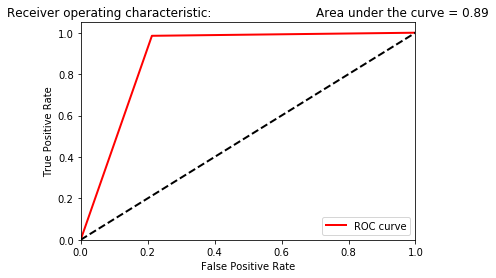

In [26]:
testresult = YinsDL.NN3_Classifier(
    X_train[X_train.columns[list(sfs1.k_feature_idx_)]], y_train, 
    X_test[X_test.columns[list(sfs1.k_feature_idx_)]], y_test, 
    l1_act='relu', l2_act='relu', l3_act='softmax',
    layer1size=128, layer2size=64, layer3size=2,
    num_of_epochs=50, plotROC=True, verbose=True)

In [125]:
X_train[X_train.columns[list(sfs2.k_feature_idx_)]].head(3)

,mean perimeter,mean fractal dimension,radius error,area error,concave points error,symmetry error,worst texture,worst area,worst smoothness,worst concavity
338,64.41,0.06331,0.2619,16.85,0.008043,0.02100,26.84,384.0,0.1402,0.1055
427,68.79,0.05977,0.3077,20.20,0.010450,0.01844,32.04,489.5,0.1303,0.1927
406,104.30,0.05875,0.2387,21.83,0.008747,0.01500,19.58,947.9,0.1206,0.2310


In [126]:
X_test[X_test.columns[list(sfs2.k_feature_idx_)]].head(3)

,mean perimeter,mean fractal dimension,radius error,area error,concave points error,symmetry error,worst texture,worst area,worst smoothness,worst concavity
512,88.64,0.07325,0.3906,33.67,0.013340,0.01705,29.66,844.4,0.1574,0.5106
457,84.10,0.05584,0.2084,17.58,0.006451,0.01347,34.23,632.9,0.1289,0.1390
439,89.59,0.05586,0.2142,19.25,0.010760,0.01171,19.31,688.9,0.1034,0.0626


Tensorflow Version:
2.0.0
Summary of Network Architecture:
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               1408      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 130       
Total params: 9,794
Trainable params: 9,794
Non-trainable params: 0
_________________________________________________________________
Train on 455 samples
Epoch 1/50
455/455 [==============================] - 0s 366us/sample - loss: 0.6608 - accuracy: 0.6066
Epoch 2/50
455/455 [==============================] - 0s 68us/sample - loss: 0.6170 - accuracy: 0.6374
Epoch 3/50
455/455 [==============================] - 0s 81us/sample - loss: 0.5940 - accuracy:

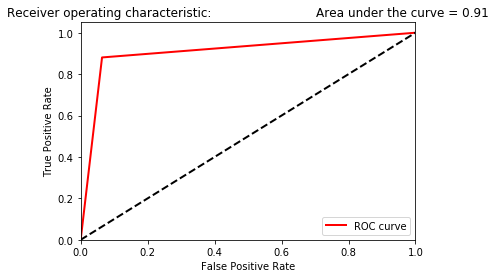

In [127]:
testresult = YinsDL.NN3_Classifier(
    X_train[X_train.columns[list(sfs2.k_feature_idx_)]], y_train, 
    X_test[X_test.columns[list(sfs2.k_feature_idx_)]], y_test, 
    l1_act='relu', l2_act='relu', l3_act='softmax',
    layer1size=128, layer2size=64, layer3size=2,
    num_of_epochs=50, plotROC=True, verbose=True)

In [128]:
X_train[X_train.columns[list(efs3.best_idx_)]].head(3)

,mean radius,mean texture,mean area,mean smoothness,mean concavity
338,10.05,17.53,310.8,0.10070,0.02511
427,10.80,21.98,359.9,0.08801,0.03614
406,16.14,14.86,800.0,0.09495,0.05500


In [129]:
X_test[X_test.columns[list(efs3.best_idx_)]].head(3)

,mean radius,mean texture,mean area,mean smoothness,mean concavity
512,13.40,20.52,556.7,0.11060,0.14450
457,13.21,25.25,537.9,0.08791,0.02772
439,14.02,15.66,606.5,0.07966,0.02087


Tensorflow Version:
2.0.0
Summary of Network Architecture:
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 128)               768       
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 130       
Total params: 9,154
Trainable params: 9,154
Non-trainable params: 0
_________________________________________________________________
Train on 455 samples
Epoch 1/50
455/455 [==============================] - 0s 364us/sample - loss: 0.6577 - accuracy: 0.6374
Epoch 2/50
455/455 [==============================] - 0s 72us/sample - loss: 0.6564 - accuracy: 0.6374
Epoch 3/50
455/455 [==============================] - 0s 77us/sample - loss: 0.6553 - accuracy:

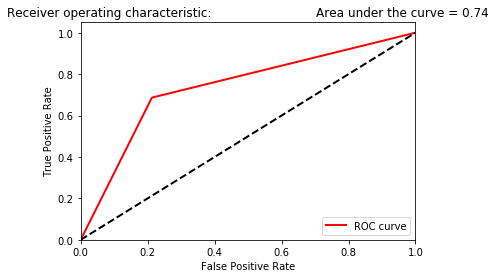

In [131]:
testresult = YinsDL.NN3_Classifier(
    X_train[X_train.columns[list(efs3.best_idx_)]], y_train, 
    X_test[X_test.columns[list(efs3.best_idx_)]], y_test, 
    l1_act='relu', l2_act='relu', l3_act='softmax',
    layer1size=128, layer2size=64, layer3size=2,
    num_of_epochs=50, plotROC=True, verbose=True)

In [41]:
X_train[uniqueVarByI].head(3)

,mean perimeter,mean area,mean smoothness,area error,compactness error,worst radius,smoothness error,concavity error,fractal dimension error,worst compactness,mean concave points,mean fractal dimension,worst smoothness
338,64.41,310.8,0.10070,16.85,0.01449,11.16,0.007803,0.01690,0.002778,0.1402,0.01775,0.06331,0.1402
427,68.79,359.9,0.08801,20.20,0.02148,12.76,0.006543,0.02991,0.002690,0.1696,0.01404,0.05977,0.1303
406,104.30,800.0,0.09495,21.83,0.01246,17.71,0.003958,0.01831,0.001621,0.1722,0.04528,0.05875,0.1206


In [42]:
X_test[uniqueVarByI].head(3)

,mean perimeter,mean area,mean smoothness,area error,compactness error,worst radius,smoothness error,concavity error,fractal dimension error,worst compactness,mean concave points,mean fractal dimension,worst smoothness
512,88.64,556.7,0.11060,33.67,0.022650,16.41,0.005414,0.034520,0.004005,0.3856,0.08172,0.07325,0.1574
457,84.10,537.9,0.08791,17.58,0.008082,14.35,0.005768,0.015100,0.001828,0.1063,0.02068,0.05584,0.1289
439,89.59,606.5,0.07966,19.25,0.009238,14.91,0.004837,0.009213,0.002104,0.1017,0.02652,0.05586,0.1034


Tensorflow Version:
1.13.0-rc1
Summary of Network Architecture:
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 128)               1792      
_________________________________________________________________
dense_19 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_20 (Dense)             (None, 2)                 130       
Total params: 10,178
Trainable params: 10,178
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
455/455 [==============================] - ETA: 1s - loss: 1.0919 - acc: 0.281 - 0s 364us/sample - loss: 0.7142 - acc: 0.5802
Epoch 2/20
455/455 [==============================] - ETA: 0s - loss: 0.6692 - acc: 0.562 - 0s 44us/sample - loss: 0.6286 - acc: 0.6857
Epoch 3/20
455/455 [==============================] - ETA: 0s - l

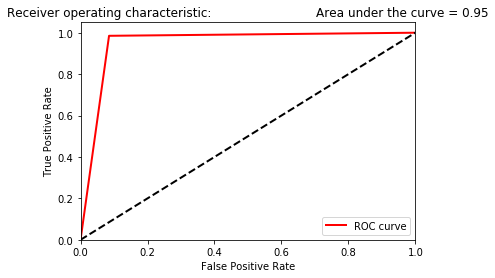

In [35]:
testresult = YinsDL.NN3_Classifier(
    X_train[uniqueVarByI], y_train,
    X_test[uniqueVarByI], y_test,
    l1_act='relu', l2_act='relu', l3_act='softmax',
    layer1size=128, layer2size=64, layer3size=2,
    num_of_epochs=20, plotROC=True, verbose=True)

### Performance Summary: Features and Test Set Accuracy

Let us summarize performance along with selected features.

| Methods | # | Features  | Performance |
| -------------------------- |:---------:| ------------:| ------------:|
| Forward           | 10 | 'mean radius', 'mean perimeter', 'mean symmetry', 'radius error', 'perimeter error', 'area error', 'concavity error', 'worst texture', 'worst perimeter', 'worst concave points' | 0.89 |
| Backward          | 10 | 'mean texture', 'mean smoothness', 'mean compactness', 'radius error', 'concavity error', 'concave points error', 'worst perimeter', 'worst smoothness', 'worst concavity', 'worst symmetry' | 0.91 |
| Both (Exhaustive) | 5 | 'mean radius', 'mean texture', 'mean area', 'mean smoothness', 'mean concavity' | 0.74 |
| Influence Score   | 14  | \['mean perimeter', 'texture error', 'area error', 'smoothness error', 'worst radius', 'worst concave points', 'mean fractal dimension', 'concavity error', 'concave points error', 'worst area', 'mean concave points', 'mean symmetry', 'worst smoothness', 'worst concavity'\] | 0.95 |

Investigation ends here.